In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generating Dataset

Parameters
* sigma : The spread of noise in the output variable
* n : the size of the data set
* m : the number of independent variables

Returns

* Beta: Randomly generated weight/parameter vector of shape (m+1, 1)
*  X: Randomly generated independent data of shape (n, m+1)
* Y: Calculated dependent variable using Beta and X according to the following formula:
        Y = Beta * X + e
Here e is the normal distribution with mean = 0 and std. dev = sigma


In [5]:
def generate_dataset(m,n, sigma):
    Beta = np.random.rand(m + 1,1) 
    X = np.random.randn(n,m+1)
    X[:,0] = 1
    e = np.random.normal(0.0,sigma, (n,1))
    Y = np.matmul(X, Beta) + e
    return Beta, X, Y

# Linear Regression Implementation 

### MSE_cost
Mean squared Error cost function. Used to guide gradient descent in appropriate direction and converge

### MSE_gradient
Derivative of MSE cost function. Gradient is used to update the parameter values



In [24]:
def MSE_cost(Y_hat, Y, n):
    cost = np.matmul((Y_hat - Y).T, Y_hat - Y)/(2*n)
    return np.squeeze(cost)

def MSE_gradient(X, Y, Y_hat, n):
    dbeta = np.matmul(X.T,(Y_hat - Y))/n
    return dbeta

def LinearRegression(X,Y,epochs,threshold):
    learning_rate = 0.01
    n = X.shape[0]
    m = X.shape[1]
    beta = np.random.rand(m,1) * 0.01
    prev_cost = float('inf')
    for epoch in range(epochs):
        Y_hat = np.matmul(X,beta) 
        curr_cost = MSE_cost(Y_hat, Y, n)
        if abs(prev_cost - curr_cost) <= threshold:
            break
        prev_cost = curr_cost
        dbeta = MSE_gradient(X, Y, Y_hat, n)
        beta = beta - (learning_rate * dbeta)
    return curr_cost, beta, cost_list


In [25]:
beta, X, Y = generate_dataset(100,1000,1.8)
cost, w, cost_list = LinearRegression(X, Y ,10000,0.0001)

# Cosine Similarity

It is the measure of how similar the learnt parameters and actual parameters are.

A value closer to 1 indicates two vectors are more similar

In [1]:
def cosine_similarity(actual, learnt):
    abs_actual = np.linalg.norm(actual)
    abs_learnt = np.linalg.norm(learnt)
    
    cos = np.matmul(actual.T, learnt) / (abs_actual * abs_learnt)
    return cos.squeeze()

Variation of learning with the distribution of data

We check how the learning is affected if std. dev. of unexplained variation is increased or decreased.

We check for sigma values: [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

In [81]:
sigma_list = [i for i in range(0, 100, 10)]
cost_list = []
similarity_list = []

m = 100
n = 1000
epochs = 10000
threshold = 0.001

for sigma in sigma_list:
    actual_beta, X, Y = generate_dataset(m, n, sigma)
    final_cost, learnt_beta = LinearRegression(X, Y, epochs, threshold)
    cost_list.append(final_cost)
    similarity_list.append(cosine_similarity(actual_beta, learnt_beta))

# Plotting variation with Std. Deviation

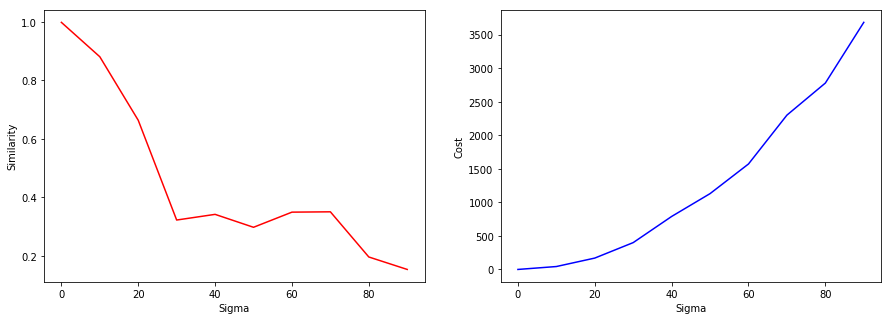

In [82]:
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(sigma_list, similarity_list, 'r')
ax1.set(xlabel='Sigma', ylabel='Similarity')

ax2 = fig.add_subplot(1,2,2)
ax2.plot(sigma_list, cost_list, 'b')
ax2.set(xlabel='Sigma', ylabel='Cost')

plt.show()

# Conclusion

> We can see as the std. dev increases, The similarity of learnt and actual parameters approach towards zero: Meaning that the model is getting worse. This is evident from the increasing cost of model with increase in Sigma